In [1]:
import pandas as pd
import numpy as np
import warnings
import math
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


In [4]:
df_polytruth = pd.read_csv('poly_truth.tsv',sep='\t')
df_quantboot = pd.read_csv('quant_bootstraps.tsv',sep='\t')
#df_quantboot['ENST00000349363']

# Calculating Transcript Deviation:

In [ ]:
import numpy as np
#df_quantboot['ENST00000382369']

df_polytruth['mean']=0
df_polytruth['std']=0


df_new = df_polytruth
#df_new['transcript_id']

#for i in df_new.columns:
#    print i
#mean = df_quantboot[row].mean()
    #print df_new[df_new['transcript_id']==i]
    #print mean
    #df_polytruth['std']= np.std(df_quantboot[i])
    
    
df_new['mean']=0
df_new['std']=0
df_new['deviation']=0
for index,row in df_new.iterrows():
    #print row
    try:
        mean = df_quantboot[row['transcript_id']].mean()
   
        df_new.loc[df_new.transcript_id==row['transcript_id'],'mean']=mean
    
        std= np.std(df_quantboot[row['transcript_id']])
        df_new.loc[df_new.transcript_id==row['transcript_id'],'std']=std
    #print df_new['std']
        row['std']=std
        row['mean'] = mean
        if row['std']!=0:
        #print abs(row['count']-row['mean'])/row['std']
            df_new.loc[df_new.transcript_id==row['transcript_id'],'deviation']= abs(row['count']-row['mean'])/row['std']
    except:
        pass
    

df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_new[df_new['deviation']>2]
    
df_good = df_new[df_new['deviation']<=2]

In [ ]:
df_quantsf = pd.read_csv("quant.sf",sep='\t')
df_faulty_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_good_prop=pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation'])
df_combined = pd.DataFrame(columns=['Name','Length','EffectiveLength','TPM','NumReads','count','mean','std','deviation','faulty'])

for index,row in df_faulty.iterrows():
    df_faulty_prop = df_faulty_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'count']=row['count']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'std']=row['std']
    df_faulty_prop.loc[df_faulty_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=1
    #df_temp.loc[index]=df_quantsf[df_quantsf['Name']==row['transcript_id']]
for index,row in df_good.iterrows():
    df_good_prop = df_good_prop.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'count']=row['count']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'mean']=row['mean']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'std']=row['std']
    df_good_prop.loc[df_good_prop.Name==row['transcript_id'],'deviation']=row['deviation']
    
    #for combined
    df_combined = df_combined.append(df_quantsf[df_quantsf['Name']==row['transcript_id']])
    df_combined.loc[df_combined.Name==row['transcript_id'],'count']=row['count']
    df_combined.loc[df_combined.Name==row['transcript_id'],'mean']=row['mean']
    df_combined.loc[df_combined.Name==row['transcript_id'],'std']=row['std']
    df_combined.loc[df_combined.Name==row['transcript_id'],'deviation']=row['deviation']
    df_combined.loc[df_combined.Name==row['transcript_id'],'faulty']=0
#df_quantsf[df_quantsf['Name']=='ENST00000342665']
#df_good_prop

df_good_prop.to_csv("good_prop.csv")

df_faulty_prop.to_csv("faulty_prop.csv")

df_combined.to_csv("combined_result.csv")
#df_combined

# Checking Correlations: 

(12713, 10)


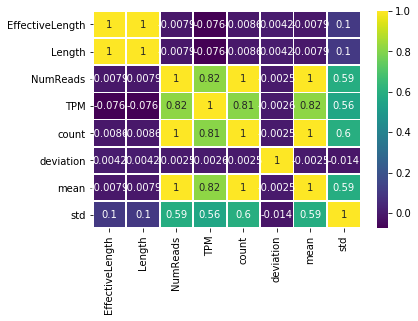

In [2]:
#df_faulty_cor = df_faulty_prop[['Length','deviation']].copy()
df_faulty_prop = pd.read_csv("faulty_prop.csv")
print (df_faulty_prop.shape)
df_faulty_cor = {'Length':df_faulty_prop['Length'],'deviation':df_faulty_prop['deviation'],'count':df_faulty_prop['count'], 'mean':df_faulty_prop['mean'],'std':df_faulty_prop['std'],'EffectiveLength':df_faulty_prop['EffectiveLength'],'TPM':df_faulty_prop['TPM'],'NumReads':df_faulty_prop['NumReads']}
df_faulty_cor = pd.DataFrame(df_faulty_cor).astype('float64')
#r = df_faulty_prop['deviation'].astype('float64').corr(df_faulty_prop['EffectiveLength'].astype('float64'))
#print r
r = df_faulty_cor.corr()
#print r
sns.heatmap(r, fmt=".2g", annot=True, cmap="viridis", linewidths=.8)
plt.show()

# Linear Regression:

In [8]:
df_res = pd.read_csv("combined_result.csv")
df_temp = {'EffectiveLength':df_res['EffectiveLength'], 'TPM':df_res['TPM'], 'faulty':df_res['faulty']}
df_temp = pd.DataFrame(df_temp)

X = {'EffectiveLength':df_temp['EffectiveLength'], 'TPM':df_temp['TPM']}
X = pd.DataFrame(X)
X = pd.DataFrame(X).values

#X = df_temp['deviation'].values[:,np.newaxis]
y =  df_res['faulty'].values

#length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
print (regr.coef_)

#print df_res.shape

[  2.05375521e-05   1.27233156e-04]


# Scatter Plots

RELATION BETWEEN TPM AND DEVIATION FOR GOOD TRANSCRIPTS:

(14176, 10)


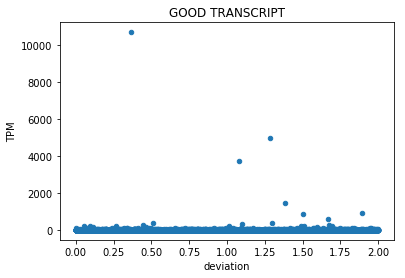

TPM          13084
deviation    13084
dtype: int64


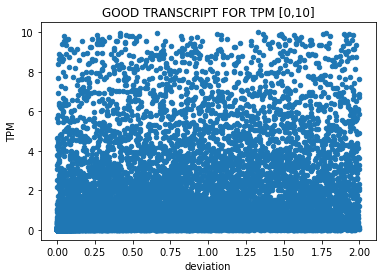

In [3]:
df_good_prop = pd.read_csv("good_prop.csv")
print (df_good_prop.shape)
df_temp = {'TPM':df_good_prop['TPM'],'deviation':df_good_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

#df_temp = df_temp[df_temp['TPM']]
df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[(df_temp['TPM']>=0) & (df_temp['TPM']<=10)]
print (df_temp.count())

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',title= 'GOOD TRANSCRIPT FOR TPM [0,10]')
plt.show()

RELATION BETWEEN TPM AND DEVIATION FOR FAULTY TRANSCRIPTS:

TPM          12713
deviation    12713
dtype: int64


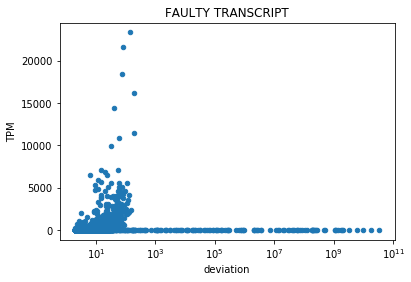

TPM          6421
deviation    6421
dtype: int64


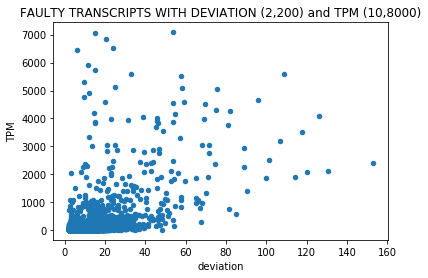

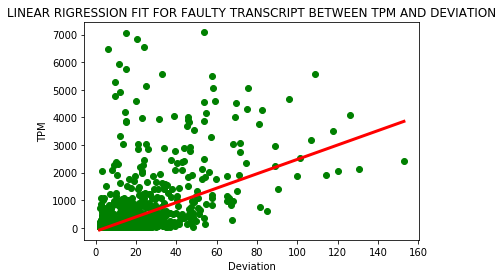

In [6]:

df_temp = {'TPM':df_faulty_prop['TPM'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='TPM',logx=1, title='FAULTY TRANSCRIPT')
print (df_temp.count())
plt.show()

#df_temp['deviation'] = df_temp['deviation'].apply(np.log)
df_temp = df_temp[df_temp['deviation']<(200)]
df_temp = df_temp[(df_temp['TPM']>10) & (df_temp['TPM']<8000)]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='TPM', title='FAULTY TRANSCRIPTS WITH DEVIATION (2,200) and TPM (10,8000)')
#plt.ylim((500,8000))
plt.show()


X = df_temp['deviation'].values[:,np.newaxis]
y =  df_temp['TPM'].values
length =  df_temp.count()
regr = linear_model.LinearRegression()
regr.fit(X,y)
plt.scatter(X,y,  color='green')
plt.plot(X, regr.predict(X), color='red', linewidth=3)
plt.xlabel("Deviation")
plt.ylabel("TPM")
plt.title("LINEAR RIGRESSION FIT FOR FAULTY TRANSCRIPT BETWEEN TPM AND DEVIATION")
plt.show()

# Conclusion: For TPM>10, 85.46% of the Transcripts are faulty.

RELATION BETWEEN EFFECTIVE LENGTH AND DEVIATION FOR GOOD TRANSCRIPTS:

EffectiveLength    14176
deviation          14176
dtype: int64


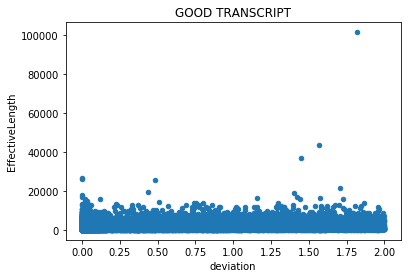

EffectiveLength    13121
deviation          13121
dtype: int64


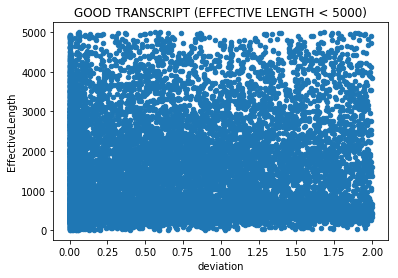

In [7]:
df_good_prop = pd.read_csv("good_prop.csv")
#print df_good_prop.shape
df_temp = {'EffectiveLength':df_good_prop['EffectiveLength'],'deviation':df_good_prop['deviation']}

df_temp = pd.DataFrame(df_temp)
#df_temp = df_temp[df_temp['EffectiveLength']<3000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength', title= 'GOOD TRANSCRIPT (EFFECTIVE LENGTH < 5000)')
plt.show()

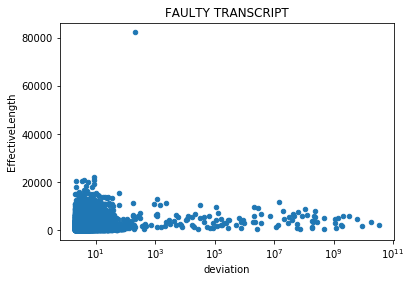

EffectiveLength    11307
deviation          11307
dtype: int64


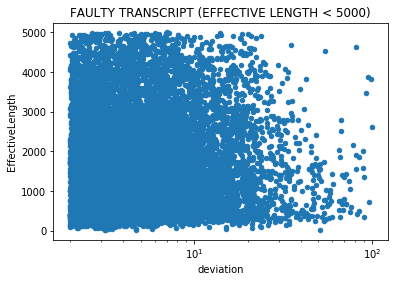

In [8]:
df_temp = {'EffectiveLength':df_faulty_prop['EffectiveLength'],'deviation':df_faulty_prop['deviation']}
df_temp = pd.DataFrame(df_temp)

df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT')
plt.show()

df_temp = df_temp[df_temp['EffectiveLength']<5000]
df_temp = df_temp[df_temp['deviation']<100]
print (df_temp.count())
df_temp.plot(kind='scatter', x ='deviation', y ='EffectiveLength',logx=1,title= 'FAULTY TRANSCRIPT (EFFECTIVE LENGTH < 5000)')
plt.show()

In [22]:
df_good = pd.read_csv('good_prop.csv')
df_fault = pd.read_csv("faulty_prop.csv")
df_combined =pd.read_csv("combined_result.csv")

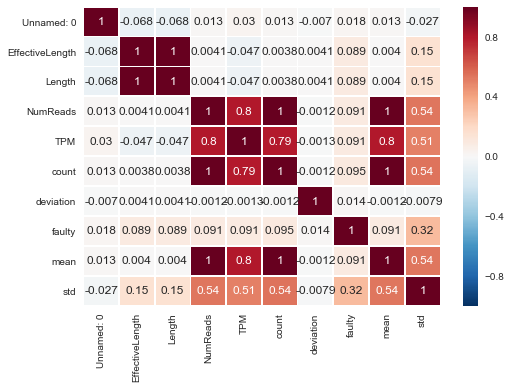

In [60]:
r = df_combined.corr(method='pearson')
sns.heatmap(r, fmt=".2g", annot=True, linewidths=.8)
plt.show()

In [6]:
df_good.columns


Index([u'Unnamed: 0', u'EffectiveLength', u'Length', u'Name', u'NumReads',
       u'TPM', u'count', u'deviation', u'mean', u'std'],
      dtype='object')

In [62]:
from sklearn.cross_validation import train_test_split

train_x, test_x, train_y, test_y = train_test_split(df_good[['EffectiveLength','NumReads','mean']],
    df_good['std'], train_size=0.7)

In [63]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_good[['EffectiveLength','NumReads','mean']], df_good['std'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
predict = lm.predict(df_fault[['EffectiveLength','NumReads','mean']])

In [65]:
predict = list(predict)
res = pd.DataFrame({'predict':predict, 'original':df_fault['std']})
res

,original,predict
0,2.667887e-09,10.518865
1,9.863275e-10,13.081199
2,5.313617e-09,10.219213
3,2.540063e-09,15.771954
4,2.309265e-08,18.635979
5,9.195648e-09,18.322057
6,3.155637e-09,10.172328
7,2.141068e-08,10.875594
8,1.125270e-08,17.145871
9,4.062530e-09,8.529337


In [66]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_fault['std'],predict)
print(mse)

136194.600215


In [67]:
df_fault['predict_std'] = res['predict']
for index,row in df_fault.iterrows():
    df_fault['new_deviation'][index] =  (row['count']-row['mean'])/row['predict_std']

KeyboardInterrupt: 

In [68]:
#df_new=df_new.sort_values('deviation', ascending=False)

df_faulty = df_fault[(df_fault['new_deviation']<2)&(df_fault['new_deviation']>-2)]
    
#df_good = df_new[df_new['deviation']<=2]